# 1. 동작 이해

## 1.1 시나리오

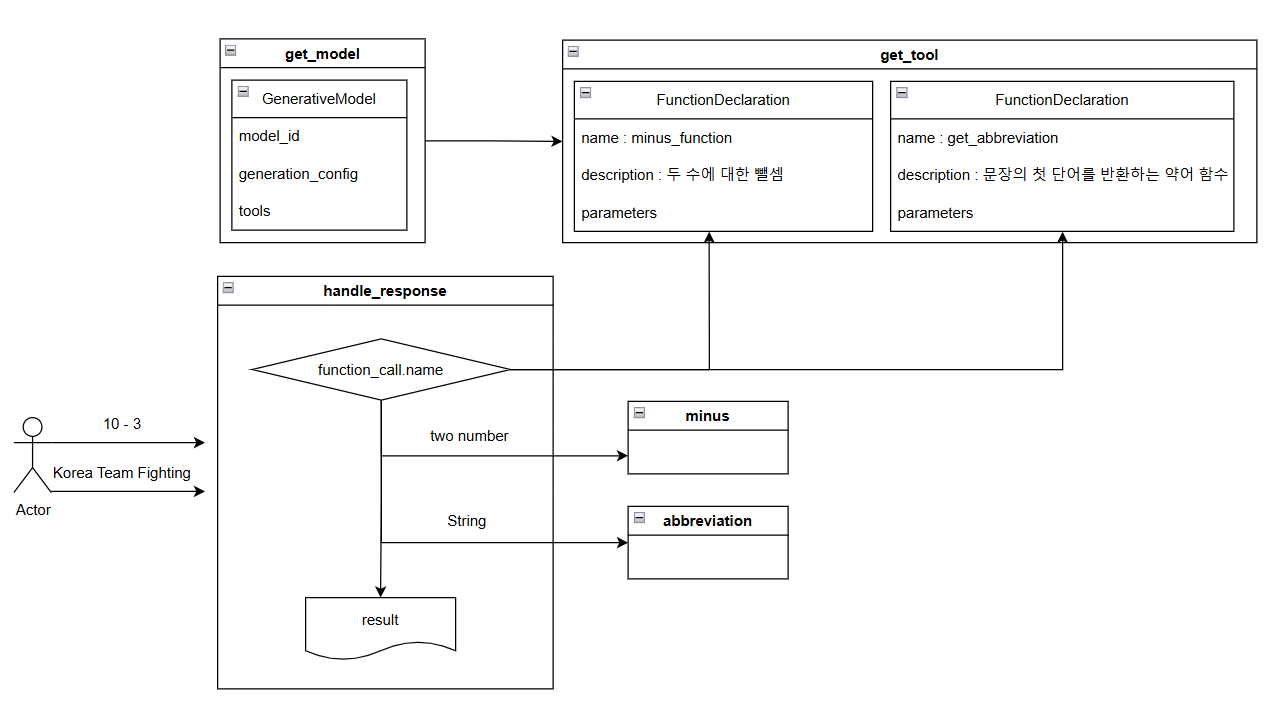

minus 연산과 약어 함수를 만들고 결과를 반환한다.

# 2. 초기화

In [46]:
import vertexai

from vertexai.generative_models import(
    GenerativeModel,
    FunctionDeclaration,
    Tool
)

In [58]:
def get_model(project_id, location, model_name, tools):
  vertexai.init(project=project_id, location=location)

  return GenerativeModel(
      model_name,
      generation_config={"temperature":0},
      tools=[tools]
  )

def get_tool():
  minus_tool = FunctionDeclaration(
      name="minus_tool",
      description="두 수에 대한 차를 구한다.",
      parameters={
          "type":"object",
          "properties":{
              "num1":{"type":"integer"},
              "num2":{"type":"integer"}
          }
      }
  )
  get_abbreviation_tool = FunctionDeclaration(
      name="get_abbreviation_tool",
      description="문자열을 약어로 변환한다.",
      parameters={
          "type":"object",
          "properties":{
              "text": {"type":"string"}
          }
      }
  )

  return Tool(function_declarations=[minus_tool, get_abbreviation_tool])

In [59]:
def minus(num1, num2):
  return num1 - num2

def get_abbreviation(text):
  abbreviation=""
  words = text.split()

  for word in words:
    abbreviation=abbreviation+(word[0].upper())

  return abbreviation

In [60]:
def handle_response(response):
  print(response.candidates[0].function_calls)

# 3. 기본 동작 확인

In [89]:
PROJECT_ID=!gcloud config get-value project
PROJECT_ID=PROJECT_ID[0]
LOCATION="us-east1"

tools = get_tool()
model = get_model(PROJECT_ID, LOCATION, "gemini-1.5-pro", tools)

chat = model.start_chat()

In [51]:
response = chat.send_message("삼 - 4와 korea team fighting")
handle_response(response)

[name: "minus"
args {
  fields {
    key: "num2"
    value {
      number_value: 4
    }
  }
  fields {
    key: "num1"
    value {
      number_value: 3
    }
  }
}
, name: "get_abbreviation"
args {
  fields {
    key: "text"
    value {
      string_value: "korea team fighting"
    }
  }
}
]


In [52]:
response = chat.send_message("재밌는 이야기 해줘")
handle_response(response)

[]


함수로 분류되는 경우 배열에 저장되며 함수가 아닌 경우 배열에서 배제된다.

# 4. 예외 처리

## 4.1 평문 처리

In [84]:
def handle_response(response):
  function_calls = response.candidates[0].function_calls
  if not function_calls :
    print(response.text)

In [85]:
response = chat.send_message("재밌는 이야기 해줘")
handle_response(response)

어느 날, 햇살 가득한 숲 속에 살고 있는 토끼 '솜사탕'은 숲 가장자리에 있는 푸른 연못에 놀러 갔어요. 솜사탕은 연못 가장자리에 앉아 발을 담그며 물장구를 치고 있었는데, 갑자기 연못에서 쿵! 하는 소리가 들렸어요. 솜사탕은 놀라서 고개를 들어 연못을 보니, 커다란 거북이 한 마리가 연못에서 뒹굴고 있었어요. 

"어머나, 괜찮으세요?" 솜사탕은 걱정스러운 목소리로 물었어요. 거북이는 끙끙거리며 "내 껍질에 딱 달라붙은 진흙 때문에 꼼짝 못 하겠어."라고 말했어요. 솜사탕은 거북이를 도와주기로 했어요. 솜사탕은 연못가에 있는 풀잎으로 거북이 껍질에 붙은 진흙을 닦아주었어요. 

"고마워, 솜사탕아. 너 덕분에 이제 자유롭게 움직일 수 있겠어." 거북이는 솜사탕에게 고맙다고 말했어요. 솜사탕은 거북이와 함께 연못에서 신나게 놀았어요. 솜사탕은 거북이에게 재미있는 이야기를 들려주었고, 거북이는 솜사탕에게 연못에 사는 물고기 이야기를 들려주었어요. 

해가 저물어 갈 무렵, 솜사탕은 집으로 돌아가야 했어요. 솜사탕은 거북이에게 "다음에 또 놀러 올게!"라고 말하고 숲으로 돌아갔어요. 솜사탕은 거북이와 함께 즐거운 시간을 보내고, 새로운 친구를 사귀게 되어 기뻤어요. 



## 4.2 함수 처리

In [107]:
def handle_response(response):
  function_calls = response.candidates[0].function_calls
  if not function_calls :
    print( response.text)
    return

  print(function_calls)
  for function_call in function_calls:
    if function_call.name == "minus_tool":
      num1 = function_call.args["num1"]
      num2 = function_call.args["num2"]
      response = chat.send_message( f"결과인 { minus(num1, num2) }을 수식으로 표현하시오" )
      handle_response(response)
    elif function_call.name == "get_abbreviation_tool":
      text = function_call.args["text"]
      response = chat.send_message( f"약어인 { get_abbreviation(text) }을 '원어(약어)'형식으로 표현하시오")
      handle_response(response)
    else:
      print(function_call)

In [108]:
response = chat.send_message("재밌는 이야기 해줘")
handle_response(response)

이야기를 지어내는 데는 소질이 없지만, 혹시 숫자나 단어로 하는 게임을 좋아하시나요? 😄 
어떤 게임을 좋아하는지 알려주시면, 함께 해볼 수 있을지도 몰라요! 



In [111]:
response = chat.send_message("삼 - 4와 'korea team fighting'의 약어")
handle_response(response)

[name: "minus_tool"
args {
  fields {
    key: "num2"
    value {
      number_value: 4
    }
  }
  fields {
    key: "num1"
    value {
      number_value: 3
    }
  }
}
, name: "get_abbreviation_tool"
args {
  fields {
    key: "text"
    value {
      string_value: "korea team fighting"
    }
  }
}
]
3 - 4 = -1 입니다. 



korea team fighting (KTF) 입니다. 



